In [124]:
import pandas as pd
import numpy as np
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [26]:
url= 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv'
df = pd.read_csv(url,index_col=0)
df = df.reset_index()

In [27]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
df['tips_percent'] = df['tip']/df['total_bill']
df

In [53]:
df_grouped = df.groupby('day')[['total_bill']].sum().reset_index()
df_grouped

,day,total_bill
0,Fri,325.88
1,Sat,1778.40
2,Sun,1627.16
3,Thur,1096.33


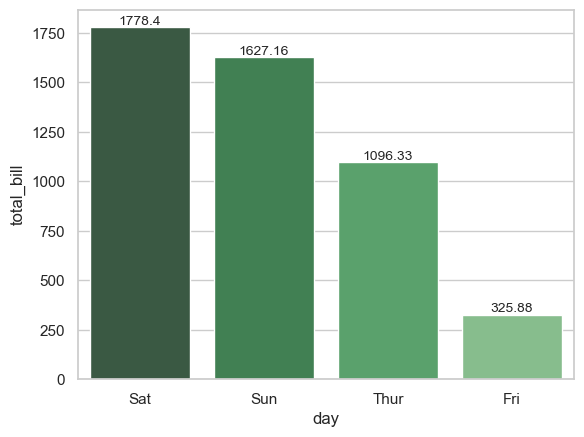

In [102]:
# Графік загальних сум рахунків відвідувачів по дням
df_grouped = df_grouped.sort_values('total_bill',ascending = False)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(df_grouped))
ax = sns.barplot(data=df_grouped, x="day", y="total_bill",palette=np.array(pal[::-1]))# palette='Set2')
ax = ax.bar_label(ax.containers[0], fontsize=10)

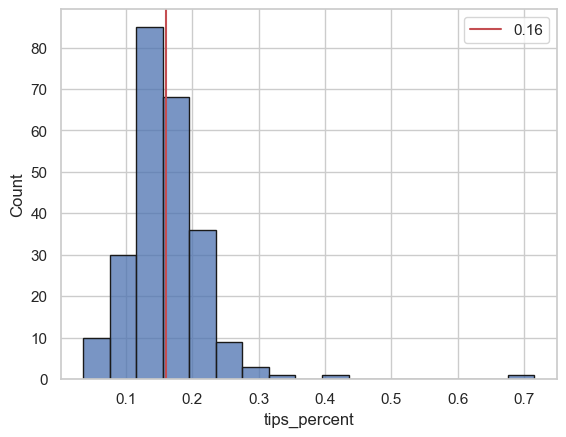

In [116]:
# Графік розподілення %чайових від загального чеку та сеердній відсоток чайових
m = stat.mean(df["tips_percent"])
sns.histplot(df["tips_percent"], binwidth=0.04, edgecolor = 'k')
plt.axvline(m,color = 'r',label = str(round(m,2)))
plt.legend()

In [130]:
# Import data from USGS. датасет для того, щоб витягнути latitude, longitude для наступних маніпуляцій
pd.set_option('display.max_columns', None)
geo_data = pd.read_csv('https://raw.githubusercontent.com/kelvins/US-Cities-Database/main/csv/us_cities.csv')
geo_data

In [140]:
#Знаходимо 1 latitude, longitude для кожного штату
geo_data_gr = geo_data.groupby('STATE_CODE')[['LATITUDE','LONGITUDE']].median().reset_index()

In [137]:
# Get automobiles crashes dataframes
auto_crashes = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/car_crashes.csv')

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [147]:
auto_crashes = auto_crashes.rename(columns={"abbrev": "STATE_CODE"})
auto_crashes_upd = auto_crashes.merge(geo_data_gr,how= 'left',on='STATE_CODE')

In [214]:
fig_alc = px.choropleth(auto_crashes_upd,
                    locations='STATE_CODE',
                    locationmode="USA-states",
                    scope="usa",
                    color='alcohol',
                    
                   )
fig_alc.add_scattergeo(
    locations=auto_crashes_upd['STATE_CODE'],
    locationmode="USA-states",
    text = round(auto_crashes_upd['alcohol'],1),
    mode = 'text',
    textfont=dict(
            family="helvetica",
            size=14,
            color="white"))

fig_alc.show()

In [215]:
# Розподіл авто-катастроф через перевищення швидкості
fig_speeding = px.choropleth(auto_crashes_upd,
                    locations='STATE_CODE',
                    locationmode="USA-states",
                    scope="usa",
                    color='speeding',
                    
                   )
fig_speeding.add_scattergeo(
    locations=auto_crashes_upd['STATE_CODE'],
    locationmode="USA-states",
    text = round(auto_crashes_upd['speeding'],1),
    mode = 'text',
    textfont=dict(
            family="helvetica",
            size=14,
            color="white"))
fig_speeding.show()

In [173]:
# Розподіл авто-катастроф через алкогольне сп'яніння
fig1 = px.scatter_geo(auto_crashes_upd, lat='LATITUDE', lon='LONGITUDE',
                     hover_name='STATE_CODE', size='alcohol', color = 'alcohol'
                     
                     )
fig1 = fig1.add_trace(
    go.Scattergeo(
        lat=[
            v
            for sub in [
                np.array(f["geometry"]["coordinates"])[:, 1].tolist() + [None]
                for f in states_geojson["features"]
            ]
            for v in sub
        ],
        lon=[
            v
            for sub in [
                np.array(f["geometry"]["coordinates"])[:, 0].tolist() + [None]
                for f in states_geojson["features"]
            ]
            for v in sub
        ],
        line_color="brown",
        line_width=1,
        mode="lines",
        showlegend=False,
    )
)

fig1.update_geos(
    visible=True, resolution=50, scope="world", showcountries=True, countrycolor="Black"
)

fig1.show()